In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PolynomialFeatures
import datetime 
import pytz
from pytz import timezone
import tarfile
from numpy import load
import os
from sklearn.manifold import TSNE
import h5py
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
import scipy as sp
from scipy import spatial
from scipy import stats

In [3]:
h5 = h5py.File('sound_data_improved.hdf5', 'r')

In [4]:
d = h5['sound_data']

In [5]:
sample_nums = np.random.choice(range(3388858), 10000, replace = False)

In [6]:
index = np.zeros(d.shape[0]).astype('bool')
index[sample_nums] = True

# Clustering on 45 dimensions

In [7]:
pca_45 = sklearnPCA(45)
projected_45 = pca_45.fit_transform(d['feature_vector'])

In [8]:
projected_tsne_45 = TSNE(n_components=2).fit_transform(projected_45[index])

Plot 1: num clusters = 2, silhouette score = 0.45824546, calinski harabasz score = 6166.386976199146, davies bouldin score = 1.0364050668514777
Plot 2: num clusters = 3, silhouette score = 0.15104209, calinski harabasz score = 3900.2564652540054, davies bouldin score = 2.0473515037803653
Plot 3: num clusters = 4, silhouette score = 0.2219503, calinski harabasz score = 4213.217277874676, davies bouldin score = 1.5206995494160753
Plot 4: num clusters = 5, silhouette score = 0.17918259, calinski harabasz score = 3370.660553567085, davies bouldin score = 2.048627945245381
Plot 5: num clusters = 6, silhouette score = 0.17264952, calinski harabasz score = 3131.4725933354475, davies bouldin score = 1.9089933025606063
Plot 6: num clusters = 7, silhouette score = 0.1717355, calinski harabasz score = 2792.16012403334, davies bouldin score = 1.961766623487595
Plot 7: num clusters = 8, silhouette score = 0.16137624, calinski harabasz score = 2502.4535783093825, davies bouldin score = 2.14296641757

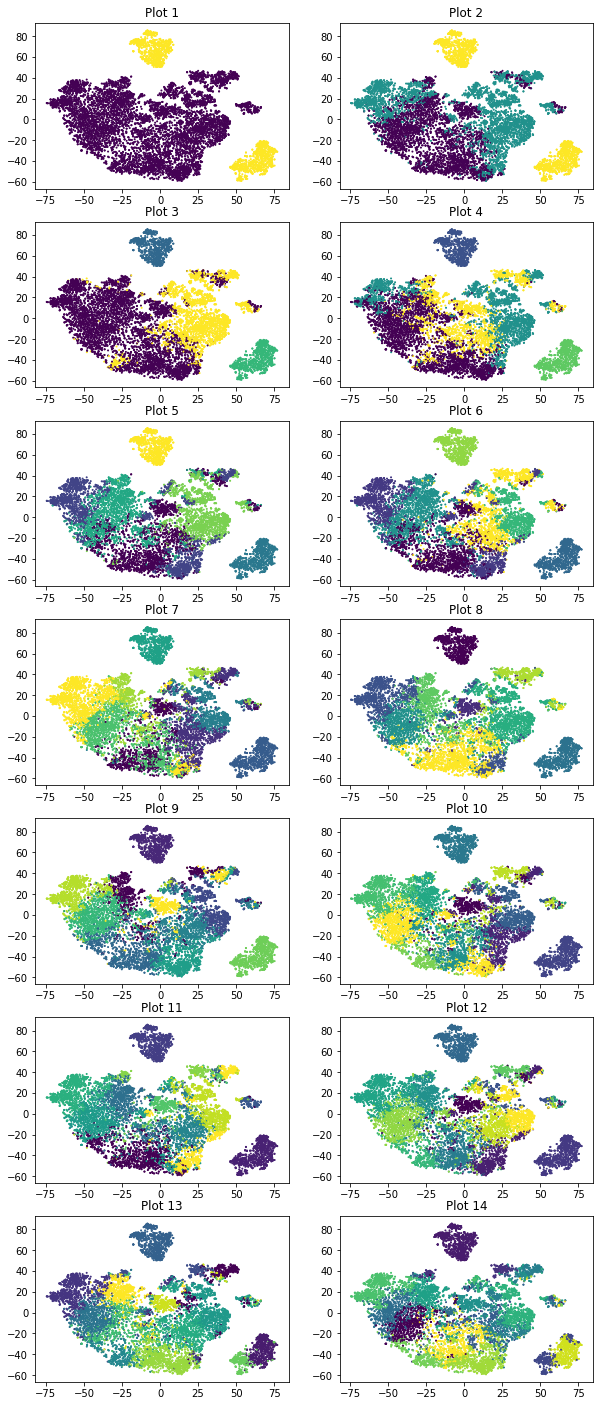

In [9]:
plt.figure(figsize=(10, 25))
idx = 1
for num_clusters in range(2, 16):
    mbk = MiniBatchKMeans(n_clusters=num_clusters, random_state=0)
    mbk_clusters = mbk.fit_predict(projected_45[index])
    plt.subplot(7, 2, idx)
    plt.scatter(projected_tsne_45[:, 0], projected_tsne_45[:, 1], c=mbk_clusters, s = 1)
    plt.title('Plot ' + str(idx))
    silhouette_score = metrics.silhouette_score(projected_45[index], mbk.labels_, metric='euclidean')
    c_h_score = metrics.calinski_harabasz_score(projected_45[index], mbk.labels_)
    d_b_score = davies_bouldin_score(projected_45[index], mbk.labels_) 
    print('Plot ' + str(idx) + ': num clusters = ' + str(num_clusters) + ', silhouette score = ' + str(silhouette_score) \
             + ', calinski harabasz score = ' + str(c_h_score) \
             + ', davies bouldin score = ' + str(d_b_score))
    idx += 1
# plt.tight_layout()
plt.show()

Plot 1: num clusters = 16, silhouette score = 0.16533303, calinski harabasz score = 1501.6844058979689, davies bouldin score = 2.211640800247135
Plot 2: num clusters = 32, silhouette score = 0.092187926, calinski harabasz score = 884.8143007084893, davies bouldin score = 2.423629864515906
Plot 3: num clusters = 64, silhouette score = 0.073192865, calinski harabasz score = 517.2968603700417, davies bouldin score = 2.3824667890998477


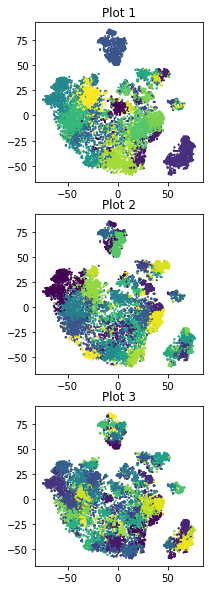

In [79]:
plt.figure(figsize=(3, 10))
idx = 1
power = 4
for power in range(4, 7):
    mbk = MiniBatchKMeans(n_clusters=2**power, random_state=0)
    mbk_clusters = mbk.fit_predict(projected_45[index])
    plt.subplot(3, 1, idx)
    plt.scatter(projected_tsne_45[:, 0], projected_tsne_45[:, 1], c=mbk_clusters, s = 1)
    plt.title('Plot ' + str(idx))
    silhouette_score = metrics.silhouette_score(projected_45[index], mbk.labels_, metric='euclidean')
    c_h_score = metrics.calinski_harabasz_score(projected_45[index], mbk.labels_)
    d_b_score = davies_bouldin_score(projected_45[index], mbk.labels_) 
    print('Plot ' + str(idx) + ': num clusters = ' + str(2**power) + ', silhouette score = ' + str(silhouette_score) \
             + ', calinski harabasz score = ' + str(c_h_score) \
             + ', davies bouldin score = ' + str(d_b_score))
    idx += 1
# plt.tight_layout()
plt.show()

In [10]:
#7 is the best num of clusters
mbk = MiniBatchKMeans(n_clusters=7, random_state=0)
mbk_clusters = mbk.fit_predict(projected_45[index])
mbk.cluster_centers_

array([[-2.77869654e+00, -2.37855577e+00,  2.30493522e+00,
        -5.61385632e-01, -1.32382309e+00,  2.86960959e-01,
         5.75852275e-01,  1.84224080e-02, -5.82660213e-02,
         2.67911971e-01, -1.06201276e-01,  1.94599763e-01,
        -1.97859574e-02,  3.06983409e-03, -8.86933208e-02,
        -5.91247156e-02,  9.70591698e-03, -3.97366136e-02,
         8.20627511e-02,  6.99079037e-02, -9.53051820e-03,
         1.44256430e-03, -5.85789084e-02, -9.40952823e-02,
         1.29482359e-01,  2.97743157e-02,  4.79746386e-02,
        -1.02023082e-02, -3.94593626e-02,  3.70411500e-02,
        -7.97399580e-02,  1.63037647e-02, -4.41756994e-02,
        -8.13027397e-02,  9.12643224e-02,  4.21563722e-02,
        -8.14285427e-02, -3.46060954e-02, -1.30007062e-02,
        -3.25519033e-02,  1.93455778e-02, -5.85527159e-03,
         1.12028774e-02,  3.01966686e-02, -3.02366000e-02],
       [-3.23370576e+00,  1.11200772e-02, -2.68456173e+00,
        -7.21141815e-01, -6.94345891e-01,  3.53878707e-

In [11]:
mbk.cluster_centers_.shape

(7, 45)

# Nearest Neighbors and Corresponding Audio Files

In [12]:
tree = spatial.KDTree(projected_45[index])

In [82]:
def get_cluster_centers(num_clusters):
    mbk = MiniBatchKMeans(n_clusters=num_clusters, random_state=0)
    mbk_clusters = mbk.fit_predict(projected_45[index])
    return mbk.cluster_centers_

In [134]:
def nearest_neighbors_df(num_clusters):
    cluster_centers_ = get_cluster_centers(num_clusters)
    size = cluster_centers_.shape[0]*5
    neighbors_arr = []
    centroids = []
    centroid_num_arr = []
    num_clusters_arr = size*[num_clusters]
    neighbors_timestamps_orig = []
    neighbors_timestamps = []
    neighbors_sensor_id = []
    neighbors_file_path = []
    neighbors_file_path_cut = []
    neighbors_timestamps_dt = np.empty(size, dtype = datetime.datetime)
    nearest_neighbors = tree.query(cluster_centers_, 5)
    make_neighbors_arr(nearest_neighbors, centroid_num, cluster_centers_, neighbors_arr, centroids, centroid_num_arr)
    retrieve_neighbors_info(neighbors_arr, neighbors_timestamps_orig, neighbors_timestamps, neighbors_sensor_id, neighbors_file_path)
    cut_file_path(neighbors_file_path,  neighbors_file_path_cut)
    convert_timestamp(neighbors_timestamps, size, neighbors_timestamps_dt)
    return make_df(centroids, neighbors_timestamps_orig, neighbors_timestamps_dt, neighbors_sensor_id, \
            neighbors_file_path_cut, centroid_num_arr, num_clusters_arr)

In [122]:
def make_neighbors_arr(nearest_neighbors, centroid_num, cluster_centers_, neighbors_arr, centroids, centroid_num_arr):
    centroid_num = 0
    for x in nearest_neighbors[1]:
        for y in x:
            feature_vector = projected_45[index][y]
            neighbors_idx = stats.mode(np.where(projected_45==feature_vector)[0])
            #Have to do mode because matches in projected_45 covered almost a whole row, but in some cases shifted a little
            neighbors_arr.append(neighbors_idx.mode[0])
            centroids.append(cluster_centers_[centroid_num])
            centroid_num_arr.append(centroid_num+1)
        centroid_num += 1

In [129]:
def retrieve_neighbors_info(neighbors_arr, neighbors_timestamps_orig, neighbors_timestamps, neighbors_sensor_id, neighbors_file_path):
    for f in neighbors_arr:
        neighbors_timestamps_orig.append(d[f, 'timestamp_orig'])
        neighbors_timestamps.append(d[f, 'timestamp'])
        neighbors_sensor_id.append(d[f, 'sensor_id'])
        neighbors_file_path.append(d[f, 'file_path'])

In [130]:
def cut_file_path(neighbors_file_path, neighbors_file_path_cut):
    for path in neighbors_file_path:
        neighbors_file_path_cut.append(path[32:])

In [131]:
def convert_timestamp(neighbors_timestamps, size, neighbors_timestamps_dt):
    for i in range(size):
        j = neighbors_timestamps[i]
        dt = datetime.datetime.utcfromtimestamp(j)
        dt = pytz.UTC.localize(dt)
        dt = dt.astimezone(pytz.timezone('US/Eastern'))
        neighbors_timestamps_dt[i] = dt

In [135]:
def make_df(centroids, neighbors_timestamps_orig, neighbors_timestamps_dt, neighbors_sensor_id, \
            neighbors_file_path_cut, centroid_num_arr, num_clusters_arr):
    df = pd.DataFrame(centroids)
    df.insert(0, "timestamp_orig", neighbors_timestamps_orig, True)
    df.insert(1, "timestamp_dt", neighbors_timestamps_dt, True)
    df.insert(2, "sensor_id", neighbors_sensor_id, True)
    df.insert(3, "file_path", neighbors_file_path_cut, True)
    df.insert(4, "centroid_num", centroid_num_arr, True)
    df.insert(5, "num_clusters", num_clusters_arr, True)
#         all_df.append(df)
    return df

In [136]:
df_2 = nearest_neighbors_df(2)
df_2.head()

,timestamp_orig,timestamp_dt,sensor_id,file_path,centroid_num,num_clusters,0,1,2,3,...,35,36,37,38,39,40,41,42,43,44
0,1.560839e+09,2019-06-18 02:23:50-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-18/02/1...,1,2,-2.771969,-0.000094,0.040804,0.250337,...,0.007834,-0.001979,-0.016219,0.005448,0.018453,-0.011836,-0.024095,-0.012441,0.002457,0.00305
1,1.561040e+09,2019-06-20 10:16:15-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-20/10/1...,1,2,-2.771969,-0.000094,0.040804,0.250337,...,0.007834,-0.001979,-0.016219,0.005448,0.018453,-0.011836,-0.024095,-0.012441,0.002457,0.00305
2,1.561626e+09,2019-06-27 05:08:17-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-27/05/1...,1,2,-2.771969,-0.000094,0.040804,0.250337,...,0.007834,-0.001979,-0.016219,0.005448,0.018453,-0.011836,-0.024095,-0.012441,0.002457,0.00305
3,1.561717e+09,2019-06-28 06:09:49-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-28/06/1...,1,2,-2.771969,-0.000094,0.040804,0.250337,...,0.007834,-0.001979,-0.016219,0.005448,0.018453,-0.011836,-0.024095,-0.012441,0.002457,0.00305
4,1.560893e+09,2019-06-18 17:27:07-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-18/17/1...,1,2,-2.771969,-0.000094,0.040804,0.250337,...,0.007834,-0.001979,-0.016219,0.005448,0.018453,-0.011836,-0.024095,-0.012441,0.002457,0.00305


Adding 3...15 clusters to df

In [143]:
for n_clusters in range(3, 16):
    df_2 = pd.concat([nearest_neighbors_df(n_clusters), df_2], ignore_index=True)

In [144]:
df_2.head()

,timestamp_orig,timestamp_dt,sensor_id,file_path,centroid_num,num_clusters,0,1,2,3,...,35,36,37,38,39,40,41,42,43,44
0,1.559492e+09,2019-06-02 12:12:58-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-02/12/1...,1,15,-3.719204,-2.775421,0.34874,0.020339,...,0.016012,-0.057039,0.085877,-0.04153,-0.06277,0.048093,-0.039281,0.063651,-0.028506,0.003164
1,1.561558e+09,2019-06-26 10:06:06-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-26/10/1...,1,15,-3.719204,-2.775421,0.34874,0.020339,...,0.016012,-0.057039,0.085877,-0.04153,-0.06277,0.048093,-0.039281,0.063651,-0.028506,0.003164
2,1.560868e+09,2019-06-18 10:19:24-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-18/10/1...,1,15,-3.719204,-2.775421,0.34874,0.020339,...,0.016012,-0.057039,0.085877,-0.04153,-0.06277,0.048093,-0.039281,0.063651,-0.028506,0.003164
3,1.559500e+09,2019-06-02 14:24:49-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-02/14/1...,1,15,-3.719204,-2.775421,0.34874,0.020339,...,0.016012,-0.057039,0.085877,-0.04153,-0.06277,0.048093,-0.039281,0.063651,-0.028506,0.003164
4,1.559484e+09,2019-06-02 09:54:39-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-02/09/1...,1,15,-3.719204,-2.775421,0.34874,0.020339,...,0.016012,-0.057039,0.085877,-0.04153,-0.06277,0.048093,-0.039281,0.063651,-0.028506,0.003164


In [145]:
df_2.tail()

,timestamp_orig,timestamp_dt,sensor_id,file_path,centroid_num,num_clusters,0,1,2,3,...,35,36,37,38,39,40,41,42,43,44
590,1.560502e+09,2019-06-14 04:41:07-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-14/04/1...,2,2,12.011145,-0.402693,-0.165325,-1.517574,...,-0.016738,-0.035926,0.005437,0.024558,-0.040289,-0.015302,-0.014325,0.014346,0.025061,0.002935
591,1.561609e+09,2019-06-27 00:19:53-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-27/00/1...,2,2,12.011145,-0.402693,-0.165325,-1.517574,...,-0.016738,-0.035926,0.005437,0.024558,-0.040289,-0.015302,-0.014325,0.014346,0.025061,0.002935
592,1.561187e+09,2019-06-22 03:07:40-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-22/03/1...,2,2,12.011145,-0.402693,-0.165325,-1.517574,...,-0.016738,-0.035926,0.005437,0.024558,-0.040289,-0.015302,-0.014325,0.014346,0.025061,0.002935
593,1.559892e+09,2019-06-07 03:12:50-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-07/03/1...,2,2,12.011145,-0.402693,-0.165325,-1.517574,...,-0.016738,-0.035926,0.005437,0.024558,-0.040289,-0.015302,-0.014325,0.014346,0.025061,0.002935
594,1.561789e+09,2019-06-29 02:12:27-04:00,b'sonycnode-b827eb491436.sonyc',b'sonycnode-b827eb491436.sonyc/2019-06-29/02/1...,2,2,12.011145,-0.402693,-0.165325,-1.517574,...,-0.016738,-0.035926,0.005437,0.024558,-0.040289,-0.015302,-0.014325,0.014346,0.025061,0.002935


Adding 16, 32, 64 clusters to df

In [147]:
for pow in range(4,7):
    df_2 = pd.concat([nearest_neighbors_df(2**pow), df_2], ignore_index=True)

In [149]:
df_2.head()

,timestamp_orig,timestamp_dt,sensor_id,file_path,centroid_num,num_clusters,0,1,2,3,...,35,36,37,38,39,40,41,42,43,44
0,1.561629e+09,2019-06-27 05:52:16-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-27/05/1...,1,64,-3.039269,-0.232411,0.766623,-0.582569,...,0.112923,0.095582,-0.08254,0.084807,0.040878,-0.007338,0.02606,-0.004541,0.044421,-0.128947
1,1.561717e+09,2019-06-28 06:09:49-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-28/06/1...,1,64,-3.039269,-0.232411,0.766623,-0.582569,...,0.112923,0.095582,-0.08254,0.084807,0.040878,-0.007338,0.02606,-0.004541,0.044421,-0.128947
2,1.560729e+09,2019-06-16 19:46:58-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-16/19/1...,1,64,-3.039269,-0.232411,0.766623,-0.582569,...,0.112923,0.095582,-0.08254,0.084807,0.040878,-0.007338,0.02606,-0.004541,0.044421,-0.128947
3,1.560701e+09,2019-06-16 11:59:24-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-16/11/1...,1,64,-3.039269,-0.232411,0.766623,-0.582569,...,0.112923,0.095582,-0.08254,0.084807,0.040878,-0.007338,0.02606,-0.004541,0.044421,-0.128947
4,1.560989e+09,2019-06-19 20:01:52-04:00,b'sonycnode-b827ebc178d2.sonyc',b'sonycnode-b827ebc178d2.sonyc/2019-06-19/20/1...,1,64,-3.039269,-0.232411,0.766623,-0.582569,...,0.112923,0.095582,-0.08254,0.084807,0.040878,-0.007338,0.02606,-0.004541,0.044421,-0.128947
